# Instructions if you are running outside AWS cloud

1. Install aws-cli:

`sudo apt install aws-cli`

2. Setup aws credentials:

`aws configure --profile "default"`

3. Create virtual environment 

`python -m venv /path/to/new/virtual/environment`

4. Activate virtual environment

`source /path/to/new/virtual/environment/bin/activate`

### Setup AWS Session

In [11]:
from boto3 import Session
from braket.aws import AwsSession

# Start Boto3 Session with your credentials profile
boto_session = Session(profile_name='default')

# Initialize Braket session with Boto3 Session credentials
aws_session = AwsSession(boto_session=boto_session)

### Install modules

In [ ]:
# Install this modules on your virtual environment
!pip install qiskit-braket-provider
!pip install boto3

# Another required packages
!pip install qiskit-nature
!pip install qiskit-aer
!pip install pyscf
!pip install pandas
!pip install matplotlib
!pip install pylatexenc

### Import Libraries

In [23]:
from qiskit import QuantumCircuit
from qiskit_braket_provider import BraketLocalBackend
from qiskit.visualization import plot_histogram
from qiskit_braket_provider import BraketProvider
from qiskit_aer import StatevectorSimulator

from braket.aws import AwsQuantumTask

### Qiskit API Documentation
[Version 1.2.0 Latest](https://docs.quantum.ibm.com/api/qiskit)

In [12]:
# Check your current API version
print(qiskit.version.get_version_info())

1.2.0


### Define a circuit

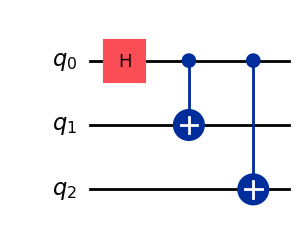

In [1]:
circuit = QuantumCircuit(3)

# Apply H-gate to the first qubit:
circuit.h(0)
# Apply a CNOT to each qubit:
for qubit in range(1, 3):
    circuit.cx(0, qubit)
circuit.draw('mpl')

### Running on Local Simulator

In [3]:
local_simulator = BraketLocalBackend()

task = local_simulator.run(circuit, shots=1000)

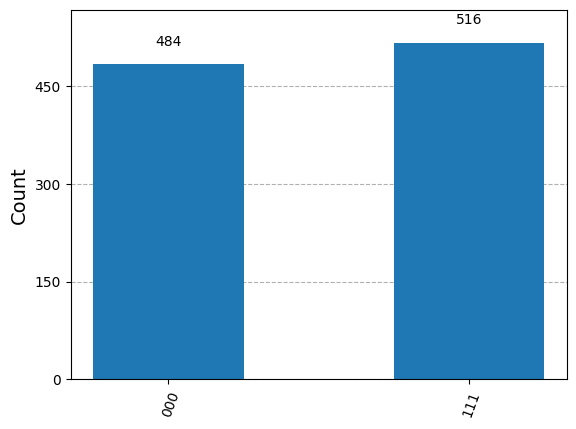

In [4]:
plot_histogram(task.result().get_counts())

### Retrieve Available Quantum Hardware

In [8]:
provider = BraketProvider()
available_aws_cloud_backends = provider.backends() 
for i in available_aws_cloud_backends: 
    print(i)

BraketBackend[Aria 1]
BraketBackend[Aria 2]
BraketBackend[Aspen-M-3]
BraketBackend[Forte 1]
BraketBackend[Garnet]
BraketBackend[Harmony]


In [18]:
statevector_simulator = StatevectorSimulator()
harmony = provider.get_backend("Harmony", aws_session=aws_session)
aria2 = provider.get_backend("Aria 2", aws_session=aws_session)
aspenM3 = provider.get_backend("Aspen-M-3", aws_session=aws_session)
garnet = provider.get_backend("Garnet", aws_session=aws_session)

### AWS Pricing
[AWS Device Pricing](https://aws.amazon.com/braket/pricing/)

### Submit task to Quantum Hardware

In [ ]:
# Submit to Aspen-M-3 and get task id
aspenM3_task = aspenM3.run(circuit, shots=10)
aspenM3_task_id = aspenM3_task.job_id()

In [ ]:
# Submit to Aria2 and get task id
aria2_task = aria2.run(circuit, shots=10)
aria2_task_id = aria2_task.job_id()

In [ ]:
# Submit to Harmony and get task id
harmony_task = harmony.run(circuit, shots=10)
harmony_task_id = harmony_task.job_id()

In [19]:
# Submit to Garnet and get task id
garnet_task = garnet.run(circuit, shots=10)
garnet_task_id = garnet_task.job_id()

### Retrieve data from task

In [24]:
def getData(task_id):
    # recover quantum task
    task_load = AwsQuantumTask(arn=task_id)

    # print status
    status = task_load.state()
    print('Status of (reconstructed) quantum task:', status)
    
    # wait for job to complete
    # terminal_states = ['COMPLETED', 'FAILED', 'CANCELLED']
    if status == 'COMPLETED':
        # get results
        results = task_load.result()

        # get all metadata of submitted quantum task
        metadata = task_load.metadata()
        
        # example for metadata
        shots = metadata['shots']
        machine = metadata['deviceArn']
        
        # print example metadata
        # print("{} shots taken on machine {}.\n".format(shots, machine))

        # get measurement counts
        counts = dict(sorted(results.measurement_counts.items()))
        print('Measurement counts:', counts)
        print('Expected value:', results.values[0])
        
        return results.values[0]

    elif status in ['FAILED', 'CANCELLED']:
        # print terminal message 
        print('Your quantum task is in terminal status, but has not completed.')
        return 0
    else:
        # print current status
        print('Sorry, your quantum task is still being processed and has not been finalized yet.')
        return 0

In [27]:
# taskIds = [aspenM3_task_id, aria2_task_id, harmony_task_id, garnet_task_id]
getData(garnet_task_id)

Status of (reconstructed) quantum task: QUEUED
Sorry, your quantum task is still being processed and has not been finalized yet.


0